# PARTE INICIAL DA ANÁLISE

. IMPORTAÇÃO DAS BIBLIOTECAS

. IMPORTAR A BASE DE DADOS E MOSTRAR EM TABELA

. VERIFICAÇÃO DETALHADA DO DATASET


In [ ]:
# BIBLIOTECAS BÁSICAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
# BIBLIOTECAS PRÉ PROCESSAMENTO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# BIBLIOTECAS DE MÉTRICAS
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# PERMITIR EXIBIR OS GRÁFICOS DO MATPLOTLIB
%matplotlib inline

In [ ]:
# CARREGANDO A BASE DE DADOS E MOSTRANDO EM TABELA
tabela = pd.read_csv('/content/Risco Credito.csv')
tabela.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [ ]:
# VERIFICANDO CARACTERÍSTICAS DO DATASET
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# MOSTRAR O TOTAL DE LINHAS E COLUNAS
tabela.shape

(150, 6)

In [ ]:
# ESSA VAI SER A COLUNA USADA COMO TARGET
tabela['Risco']

0       Risco_Alto
1       Risco_Alto
2       Risco_Alto
3       Risco_Alto
4       Risco_Alto
          ...     
145    Risco_Baixo
146    Risco_Baixo
147    Risco_Baixo
148    Risco_Baixo
149    Risco_Baixo
Name: Risco, Length: 150, dtype: object

In [ ]:
# UMA ANÁLISE DESCRITIVA DE TODA A BASE DE DADOS
tabela.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# VOU VERIFICAR A DISTRIBUIÇÃO DAS CLASSES
tabela['Risco'].value_counts()

Risco_Alto     50
Risco_Medio    50
Risco_Baixo    50
Name: Risco, dtype: int64

In [ ]:
# VERIFICANDO SI EXISTE VALORES AUSENTES NO DATASET
tabela.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

# PARTE DE BUSCA POR INSIGTS VALIOSOS

. GRÁFICO BOXPLOT

. GRÁFICO DE HISTOGRAMA

.  E OS DOIS GRÁFICOS DE DISTRIBUIÇÃO UNIVARIADA


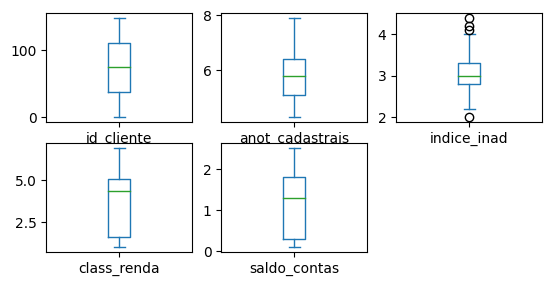

In [ ]:
# FAZENDO A UTILIZAÇÃO DO GRÁFICO BOXPLOT PARA VER SI TEM OUTLIERS
tabela.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

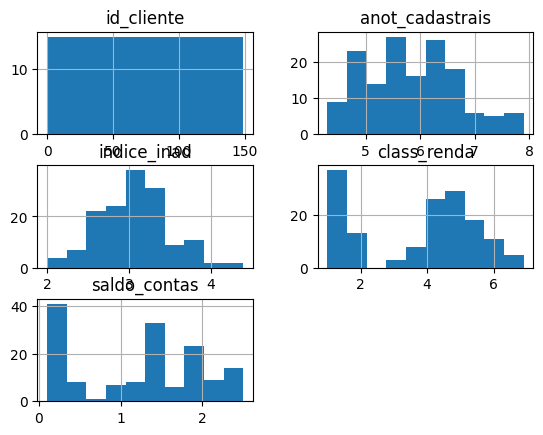

In [ ]:
# ANALISANDO NO GRÁFICO HISTOGRAMA
tabela.hist()
plt.show()

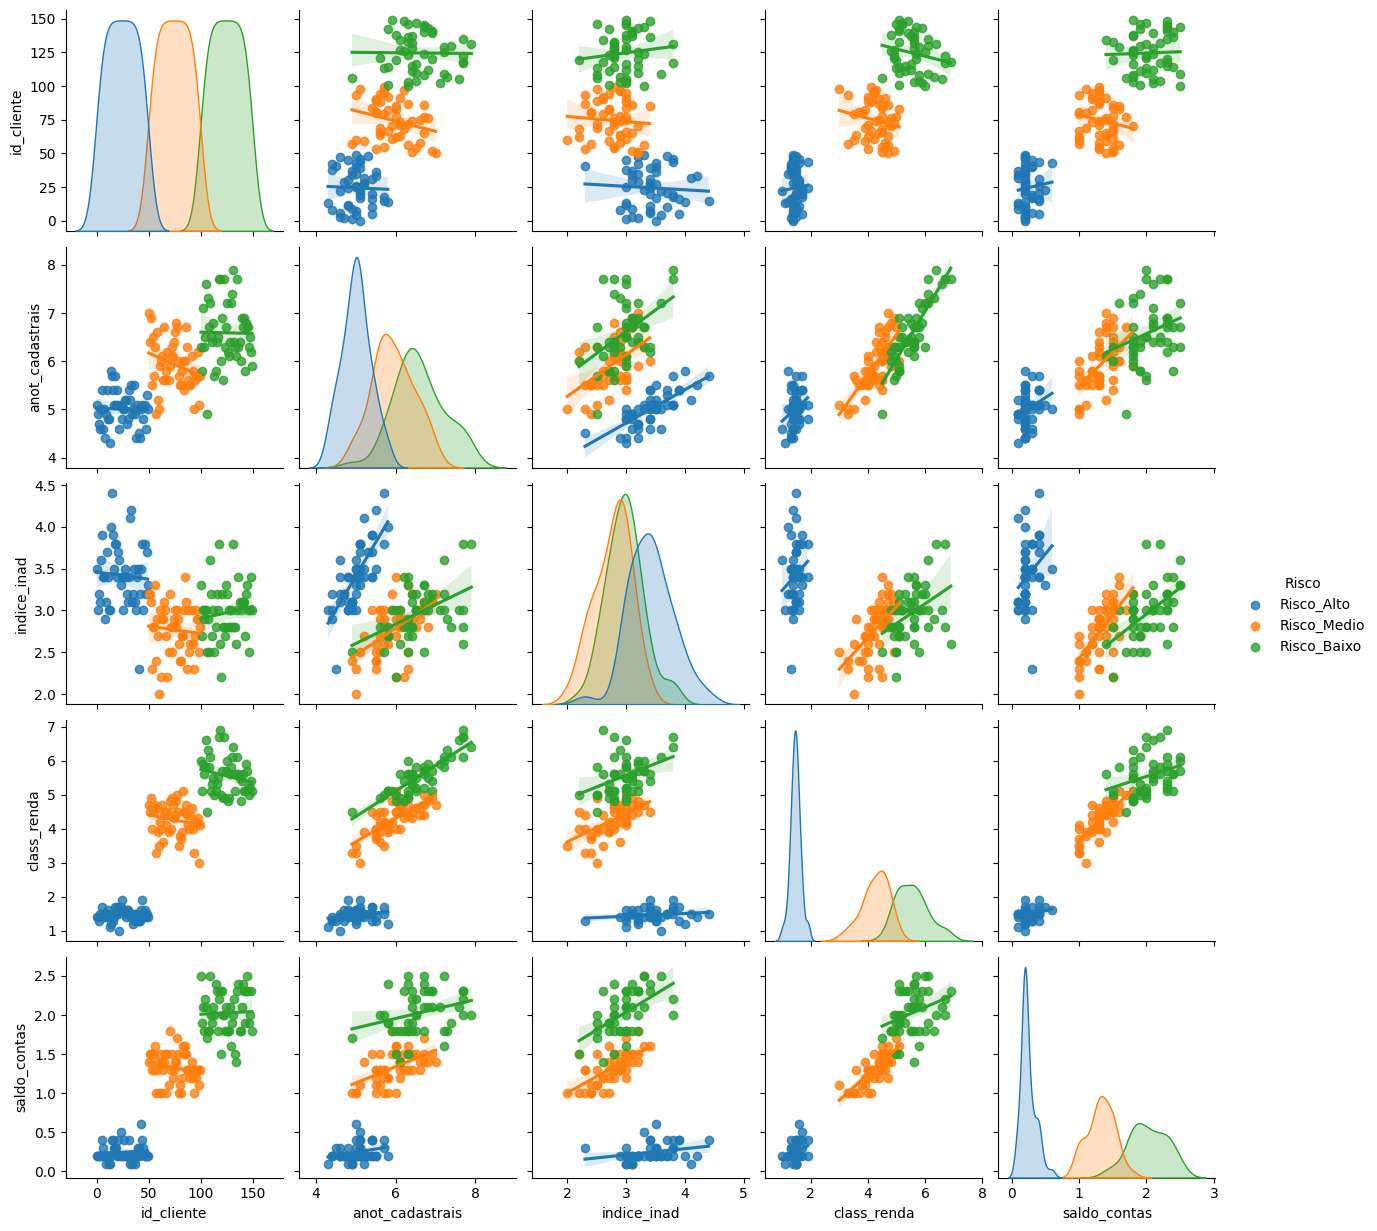

In [ ]:
# PROCURANDO ALGUM INSIGHT EM UM GRÁFICO COM MAIS OPÇÕES
sns.pairplot(tabela, hue='Risco',kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


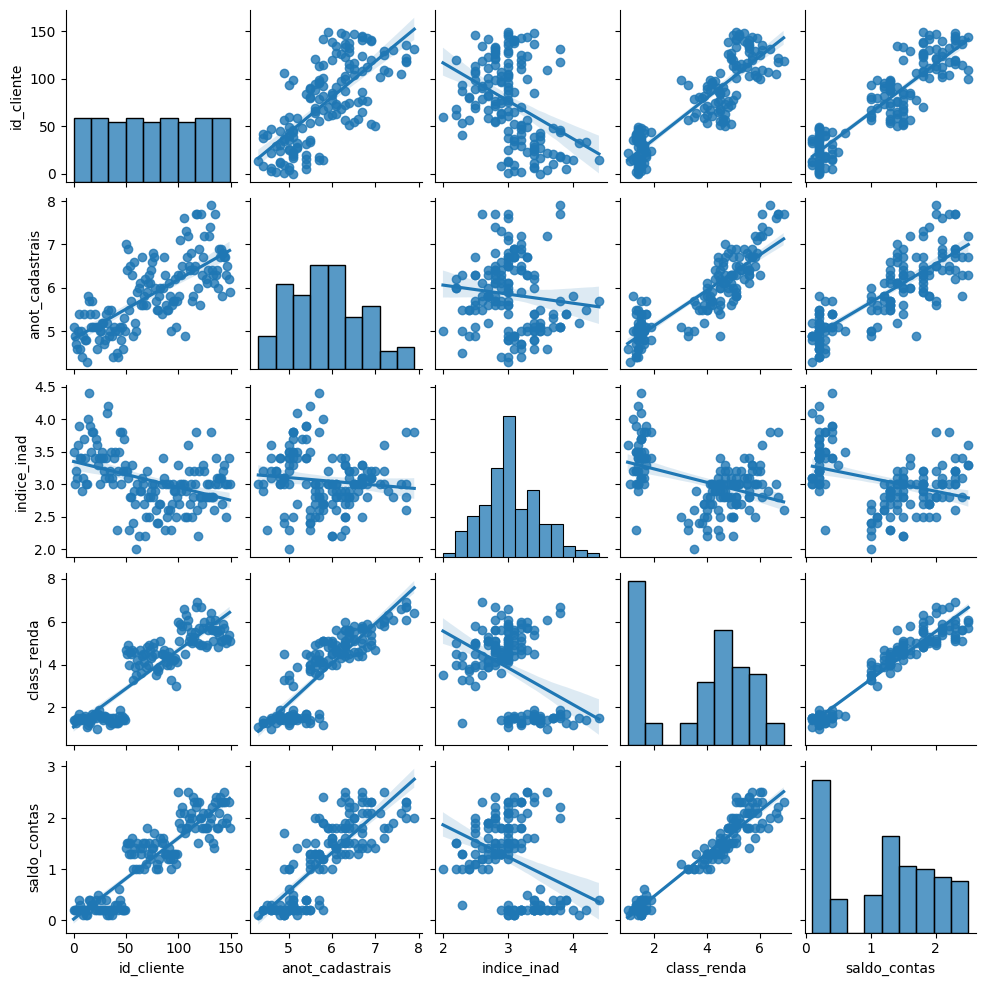

In [ ]:
# O MESMO GRÁFICO MAIS COM OUTROS PARÂMETROS
sns.pairplot(tabela,kind='reg',size=2)

# PARTE DE PRÉ PROCESSAMENTO DOS DADOS

In [ ]:
# VOU EXCLUIR A COLUNA 'id_cliente' PORQUE ELA NÃO TEM RELEVANDIA PARA O MODELO
tabela = tabela.drop(columns='id_cliente')
tabela.head()

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto


In [ ]:
# VOU SEPARAR A VARIÁVEL DEPENDENTE Y E A VARIÁVEL INDEPENDENTE X
x = tabela.iloc[:,:-1].values
y = tabela.iloc[:,-1].values

In [ ]:
# MOSTRAR AGORA TRÊS EXEMPLOS DE X E Y
print('\nVariáveis de entrada da avaliação:\n',x[:3])
print('\nRisco variável a ser predita:\n',y[:3])


Variáveis de entrada da avaliação:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco variável a ser predita:
 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [ ]:
# SEPARANDO MINHA BASE DE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
# MOSTRAR TRÊS EXEMPLOS DA BASE DE TREINO DE X E Y
print('x de treino:\n', x_train[:3])
print('y de treino:\n', y_train[:3])

x de treino:
 [[6.6 3.  4.4 1.4]
 [5.4 3.9 1.7 0.4]]
y de treino:
 ['Risco_Medio' 'Risco_Alto']


In [ ]:
# AGORA O MESMO PARA A BASE DE TESTE
print('x de teste:\n', x_test[:3])
print('y de teste:\n', y_test[:3])

x de teste:
 [[5.6 3.  4.5 1.5]
 [6.3 3.3 6.  2.5]
 [4.8 3.  1.4 0.3]]
y de teste:
 ['Risco_Medio' 'Risco_Baixo' 'Risco_Alto']


In [ ]:
# QUERO VER O TOTAL DE DADOS SEPARADO PARA TREINO
print(f'Shape dos dados de treino é {x_train.shape}')
print(f'Shape dos dados de treino é {y_train.shape}')

Shape dos dados de treino é (120, 4)
Shape dos dados de treino é (120,)


PRÉ-PROCESSAMENTO DOS DADOS

In [ ]:
st = StandardScaler()

In [ ]:
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [ ]:
print('\nx_treino: \n', x_train[:5])


x_treino: 
 [[ 0.87627413 -0.05871475  0.33919814  0.26203232]
 [-0.54952785  1.98683151 -1.2065149  -1.08172318]
 [ 1.23272463  0.16856816  0.6254413   0.39640787]
 [-0.54952785 -0.05871475  0.39644677  0.39640787]
 [ 0.40100681 -1.8769781   0.39644677  0.39640787]]


In [ ]:
print('\nx_teste: \n', x_test[:5])


x_teste: 
 [[-0.31189418 -0.05871475  0.39644677  0.39640787]
 [ 0.51982364  0.623134    1.25517624  1.74016338]
 [-1.26242883 -0.05871475 -1.3782608  -1.21609873]
 [ 0.99509096  0.16856816  0.51094403  0.39640787]
 [-1.73769616 -0.05871475 -1.43550943 -1.35047428]]


UTILIZANDO OS MODELOS DO SCIKIT-LEARN

In [ ]:
maq_preditiva = KNeighborsClassifier()
maq_preditiva = maq_preditiva.fit(x_train, y_train)

In [ ]:
y_previsao = maq_preditiva.predict(x_test)

In [ ]:
print('Valores reais com os dados de teste: \n', y_test)

Valores reais com os dados de teste: 
 ['Risco_Medio' 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [ ]:
print('Valores preditivos: \n', y_previsao)

Valores preditivos: 
 ['Risco_Medio' 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [ ]:
maq_preditiva.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Metricas

In [ ]:
print('Acurácia da máquina é: ', metrics.accuracy_score(y_test, y_previsao)*100)

Acurácia da máquina é:  100.0


In [ ]:
print('\n Real vs Preditivo \n')
erro_df = pd.DataFrame({"Real": y_test, "Preditivo": y_previsao})


 Real vs Preditivo 



In [ ]:
erro_df.head(5)

,Real,Preditivo
0,Risco_Medio,Risco_Medio
1,Risco_Baixo,Risco_Baixo
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Alto,Risco_Alto


In [ ]:
print('Acurácia da máquina é: ', metrics.accuracy_score(y_test, y_previsao)*100)
cm = confusion_matrix(y_test,y_previsao)
cr = metrics.classification_report(y_test,y_previsao)

print(cm)
print(cr)

Acurácia da máquina é:  100.0
[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00        12
 Risco_Baixo       1.00      1.00      1.00         9
 Risco_Medio       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
classifier = SVC(kernel='linear',gamma=1e-5, C=10,)
# ['linear','rbf','poly','sigmoid'] Kernel
# [1e-1, 1e-2, 1e-3, 1e-4, 1e-5] gamma
# [10.0, 100.0, 1000.0, 10000.0] C

In [ ]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
print('predicted values for test set: \n', y_pred)
print('\n---------------\n')
print('Actual values for test: \n', y_test)

predicted values for test set: 
 ['Risco_Medio' 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo']

---------------

Actual values for test: 
 ['Risco_Medio' 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [ ]:
classifier

SVC(C=10, gamma=1e-05, kernel='linear')

In [ ]:
print('Acurácia da máquina é: ', metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = metrics.classification_report(y_test,y_pred)

print(cm)
print(cr)

Acurácia da máquina é:  96.66666666666667
[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00        12
 Risco_Baixo       0.90      1.00      0.95         9
 Risco_Medio       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

